Tarea Multaines

In [2]:
from __future__ import print_function 
import matplotlib.pyplot as plt
import copy
import numpy as np
%matplotlib inline
from pylab import *
import os
import pandas as pd

In [3]:
from colossus.cosmology import cosmology

In [4]:
cosmo = cosmology.setCosmology('planck15')
print(cosmo)

Cosmology "planck15" 
    flat = True, Om0 = 0.3089, Ode0 = 0.6910, Ob0 = 0.0486, H0 = 67.74, sigma8 = 0.8159, ns = 0.9667
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


In [5]:
pk_cmasdr12=np.loadtxt("/Users/stefany/Desktop/analisisdatos/da2019-Stefany2889/datos/GilMarin_boss_data/post-recon/cmass/GilMarin_2016_CMASSDR12_measurement_monopole_post_recon.txt").T

Parametros con multinest

  $\Omega $ : 0.357 +- 0.002
             b : 1.882 +- 0.115
              $\beta $ : 0.309 +- 0.156

/Users/stefany/miniconda3/envs/analisis-env/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/stefany/miniconda3/envs/analisis-env/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


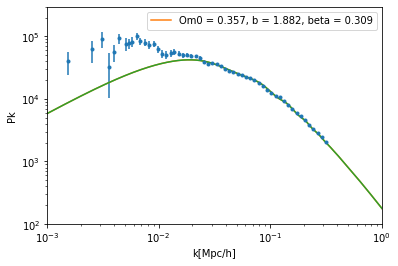

In [17]:
#labels = ["omega", "b", "beta"]
plt.figure()
plt.loglog()
plt.errorbar(pk_cmasdr12[0],pk_cmasdr12[1], yerr=pk_cmasdr12[2], fmt='.' )
k = 10**np.linspace(-5,6,100000)
cosmo.Om0 = 0.357
Pk = (1.882)**2*(1+0.309)*cosmo.matterPowerSpectrum(k,0.57)
plt.plot(k,Pk, '-', label = 'Om0 = 0.357, b = 1.882, beta = 0.309')
plt.ylabel('Pk')
plt.xlabel('k[Mpc/h]')
plt.plot(k, Pk, '-')
plt.xlim(1e-3,1)
plt.ylim(100,3e5)

plt.legend()

Parametros con EMCEE

  $\Omega $ : 0.355 +- 0.004
             b : 1.838 +- 0.152
              $\beta $ : 0.332 +- 0.182

Text(0, 0.5, 'P(k)')

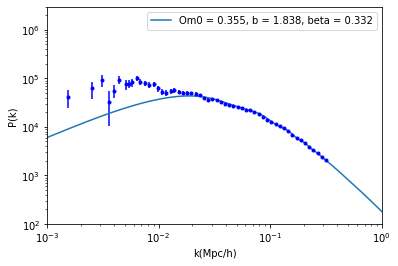

In [16]:
cosmo.Om0 = 0.355
Pk = 1.838**2*(1+0.332)*cosmo.matterPowerSpectrum(k,0.57)

plt.plot(k,Pk, '-', label = 'Om0 = 0.355, b = 1.838, beta = 0.332') # Con bias
plt.errorbar(pk_cmasdr12[0], pk_cmasdr12[1], yerr = pk_cmasdr12[2], fmt = '.b')

#plt.figure(figsize = (7,7))
plt.loglog()  
plt.xlim(1e-3,1)
plt.ylim(100,3e6)
plt.legend()
plt.xlabel('k(Mpc/h)')
plt.ylabel('P(k)')